In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import matplotlib
from matplotlib.pyplot import figure
from matplotlib.colors import ListedColormap

## Training Hours & Number of Parameters

In [21]:

data_path = './data/results.csv'


In [2]:
import os 
import csv

data_path = './data'
jsonn_file = 'metrics.json'

num_found_files = 0

for file in os.listdir(data_path):
    if 'csv' in file:
        print(' Loading yolo metrics in csv')
        num_found_files = num_found_files + 1
        csv_path = os.path.join(data_path, file)
        
        dics = {}
        val_box_loss = []
        val_obj_loss = []
        val_cls_loss = []
        with open(csv_path, newline='') as file:
            reader = csv.reader(file)
            for row in reader:
                val_box_loss.append(row[8])
                val_obj_loss.append(row[9])
                val_cls_loss.append(row[10])
        dics_key1 = val_box_loss[0]
        dics_key2 = val_obj_loss[0]
        dics_key3 = val_cls_loss[0]
        val_box_loss.pop(0)
        val_obj_loss.pop(0)
        val_cls_loss.pop(0)
        dics[dics_key1] = val_box_loss
        dics[dics_key2] = val_obj_loss
        dics[dics_key3] = val_cls_loss



        print(f' dic   {dics}')

#         print(f' dic key boxx  {dics_key}')
#         print(f' dic val boxx  {dic_value}')    

            
        print('DONE')


 Loading yolo metrics in csv
 dic   {'        val/box_loss': ['            0.021244', '             0.02398', '            0.022042', '            0.020041', '            0.020251', '            0.019776', '            0.019538', '            0.019183', '            0.019057', '            0.019165', '            0.018499', '            0.019119', '            0.018939', '            0.018726', '            0.018581', '            0.018747', '            0.018656', '            0.018792', '            0.018587', '            0.018592', '            0.018321', '             0.01841', '            0.018549', '            0.018651', '            0.018556', '            0.018492', '            0.018366', '             0.01834', '            0.018332', '            0.018349', '            0.018347', '            0.018334', '            0.018331', '              0.0183', '            0.018263', '            0.018259', '            0.018249', '            0.018247', '            0.018241', ' 

In [39]:
avg_loss = []
nn_all = []
mm = 0

for a, b, c in zip(val_box_loss, val_obj_loss, val_cls_loss):
    avg = (float(a) + float(b) + float(c))/3
    avg_loss.append(100 - avg*1000)
    mm = mm + 1
    nn_all.append(mm)
print(f'avg_loss {avg_loss} ')
print('done')
print(len(nn_all))

avg_loss [90.98346666666667, 90.1872, 90.85196666666667, 91.79143333333333, 91.6194, 91.78523333333334, 91.9161, 92.00693333333334, 92.06176666666667, 92.09573333333333, 92.2926, 92.0638, 92.16586666666666, 92.17803333333333, 92.21809999999999, 92.22563333333333, 92.2574, 92.19593333333333, 92.2656, 92.26436666666666, 92.37923333333333, 92.33606666666667, 92.26653333333333, 92.233, 92.26533333333333, 92.28713333333333, 92.34206666666667, 92.3573, 92.3618, 92.35436666666666, 92.35053333333333, 92.34063333333333, 92.3419, 92.35223333333333, 92.36923333333333, 92.37283333333333, 92.3756, 92.37646666666666, 92.37716666666667, 92.37756666666667, 92.3721, 92.3611, 92.3529, 92.34693333333334, 92.33923333333334, 92.33203333333333, 92.32156666666667] 
done
47


In [40]:
for nn, ac in zip(nn_all, avg_loss):
    if ac == min(avg_loss):
        print(f'lowest lost { ac } at epoch {nn}')

lowest lost 90.1872 at epoch 2


In [44]:
for nn, ac in zip(nn_all, avg_loss):
    if ac == max(avg_loss):
        print(f' best accurecy { ac } at epoch {nn}')

 best accurecy 92.37923333333333 at epoch 21


In [41]:
tu = tuple(avg_loss)


In [42]:
df2=pd.DataFrame({'x_values': np.linspace(0,47,len(np.random.randn(47))),
                 
                 'y1_values': tu
                                         
})

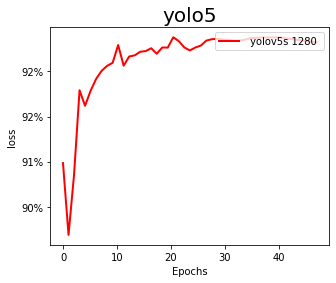

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

fig = plt.figure(1, (5, 4))
ax = fig.add_subplot(1,1,1)

ax.plot( 'x_values', 'y1_values',   data=df2, marker='', markevery=10, markersize=15, color='red', linewidth=2, label=" yolov5s 1280 ")
# ax.plot( 'x_values', 'y9_values',  data=df2, marker='', markevery=1, markersize=5, color='white', linewidth=2, label="")

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
xticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(xticks)

plt.title('yolo5', size = 20)
plt.xlabel('Epochs')
plt.ylabel('loss')

# show legend
plt.legend(loc='upper right')

plt.show()